<a href="https://colab.research.google.com/github/ArashRasti/FDS/blob/master/Facial_keypoints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Facial keypoints detection

In this task you will create facial keypoint detector based on CNN regressor.


![title](https://github.com/ArashRasti/dlvision/blob/master/week%202/facial-keypoints/example.png?raw=1)

### Load and preprocess data

Script `get_data.py` unpacks data — images and labelled points. 6000 images are located in `images` folder and keypoint coordinates are in `gt.csv` file. Run the cell below to unpack data.

In [0]:
from get_data import unpack
# unpack('facial-keypoints-data.zip')

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [5]:
path = '../content/gdrive/My Drive/coursera/dlvision/week2/'
%cd ~/../content/gdrive/My Drive/coursera/dlvision/week2/

# delete duplicate '*(1)*.jpg' files
# %cd ~/../content/gdrive/My Drive/coursera/dlvision/week2/data/images
# !ls  -1 | wc -l
# #!md5sum * | sort -k1 | uniq -w 32 -d
# !rm *\(1*

!ls 

/content/gdrive/My Drive/coursera/dlvision/week2
data


Now you have to read `gt.csv` file and images from `images` dir. File `gt.csv` contains header and ground truth points for every image in `images` folder. It has 29 columns. First column is a filename and next 28 columns are `x` and `y` coordinates for 14 facepoints. We will make following preprocessing:
1. Scale all images to resolution $100 \times 100$ pixels.
2. Scale all coordinates to range $[-0.5; 0.5]$. To obtain that, divide all x's by width (or number of columns) of image, and divide all y's by height (or number of rows) of image and subtract 0.5 from all values.

Function `load_imgs_and_keypoint` should return a tuple of two numpy arrays: `imgs` of shape `(N, 100, 100, 3)`, where `N` is the number of images and `points` of shape `(N, 28)`.

In [62]:
#%%timeit -r 1 -n 1

### Useful routines for preparing data


from numpy import array, zeros
from os.path import join
import os.path
from skimage.color import gray2rgb
from skimage.io import imread
from skimage.transform import resize
import numpy as np
import pandas as pd
import time
import glob


def f(x):
    return list(x)[1:]
    


def load_imgs_and_keypoints(dirname='facial-keypoints'):
    # Write your code for loading images and points here

    #gt_data = np.genfromtxt(data_dir+"gt.csv", delimiter=',', names=True)
    #points = np.array(list(map(lambda x: list(x)[1:], gt_data)))
    gt_data = pd.read_csv(data_dir+"gt.csv")

    image_list = []
    points_list = []
    files = glob.glob(images_dir+'*.jpg')
    for i, fullFilename in enumerate(files):
        im = imread(fullFilename)
        h = im.shape[0]
        w = im.shape[1]    

        filename = os.path.basename(fullFilename)
        pts = gt_data[gt_data.columns[1:]][gt_data["filename"] == filename].values[0].astype(float)
        #pts = np.array(list(gt_data[i])[1:])
        pts[0::2] = pts[0::2] / float(w) - 0.5
        pts[1::2] = pts[1::2] / float(h) - 0.5
        points_list.append(pts)
        im = resize(im, (100, 100), mode='reflect')
        if len(im.shape) < 3 :
            im = gray2rgb(im)
        image_list.append(im) 
        if i % 10 == 0:
            print(i)
    
    images = np.zeros((len(image_list), 100, 100, 3))
    points = np.zeros((len(points_list), points_list[0].shape[0]))
    for i,image in enumerate(image_list) :
        images[i, :,:,:] = image
        points[i, :] = points_list[i]
    
    return images, points
    
data_dir = "data/"
images_dir = data_dir + "images/"
start = time.time()
imgs, points = load_imgs_and_keypoints()
print(time.time() - start)
np.save(data_dir+"imgs.npy", imgs)
np.save(data_dir+"points.npy", points)

# start = time.time()
# imgs = np.load(data_dir+"imgs.npy")
# points = np.load(data_dir+"points.npy")
# print(time.time() - start)

print(imgs.shape)
print(points.shape)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2190
2200
2210
2

In [59]:
import pandas as pd

ggg = pd.read_csv(data_dir+"gt.csv")
ggg.head()
ggg[ggg.columns[1:]][ggg["filename"] == '00000.jpg'].values[0].shape
#ggg[][ggg["filename"] == "00000.jpg"]
# gt_data1 = np.genfromtxt(data_dir+"gt.csv", delimiter=',', names=True)
# print(gt_data1)

(28,)

array([-0.32840237, -0.25739645, -0.14497041, -0.30473373,  0.13313609,
       -0.30473373,  0.32840237, -0.26923077, -0.28698225, -0.18047337,
       -0.20414201, -0.19230769, -0.10946746, -0.19230769,  0.1035503 ,
       -0.19230769,  0.19822485, -0.19230769,  0.27514793, -0.18639053,
        0.02071006, -0.03254438, -0.15088757,  0.15680473,  0.00295858,
        0.16272189,  0.15088757,  0.16272189])

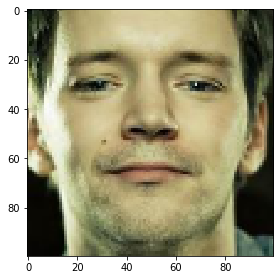

In [63]:
# Example of output
%matplotlib inline
from skimage.io import imshow
imshow(imgs[0])
points[0]

### Visualize data

Let's prepare a function to visualize points on image. Such function obtains two arguments: an image and a vector of points' coordinates and draws points on image (just like first image in this notebook).

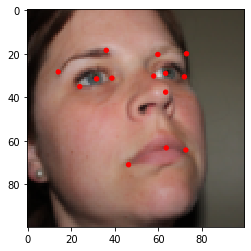

In [70]:
import matplotlib.pyplot as plt
# Circle may be useful for drawing points on face
# See matplotlib documentation for more info
from matplotlib.patches import Circle

def visualize_points(img, points):
    # Write here function which obtains image and normalized
    # coordinates and visualizes points on image
    
    h = img.shape[0]
    w = img.shape[1]
    fig,ax = plt.subplots(1)
    # ax.set_aspect('equal')
    ax.imshow(img)    
    numLoc = points.shape[0]
    image = img.copy()
    for i in range(0,numLoc,2):
        x = (points[i] + 0.50) * 100
        y = (points[i+1] + 0.50) * 100
        circ = Circle((x, y), 1, color="r")
        ax.add_patch(circ)
    
    #plt.show()
    
visualize_points(imgs[1], points[1])

### Train/val split

Run the following code to obtain train/validation split for training neural network.

In [0]:
from sklearn.model_selection import train_test_split
imgs_train, imgs_val, points_train, points_val = train_test_split(imgs, points, test_size=0.1)

### Simple data augmentation

For better training we will use simple data augmentation — flipping an image and points. Implement function flip_img which flips an image and its' points. Make sure that points are flipped correctly! For instance, points on right eye now should be points on left eye (i.e. you have to mirror coordinates and swap corresponding points on the left and right sides of the face). VIsualize an example of original and flipped image.

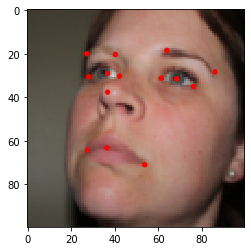

In [71]:
def flip_img(img, points):
    # Write your code for flipping here
    image = img[::, ::-1]
    pnts = points.copy()
    pnts[::2] = -pnts[::2]
    return image, pnts

f_img, f_points = flip_img(imgs[1], points[1])
visualize_points(f_img, f_points)

Time to augment our training sample. Apply flip to every image in training sample. As a result you should obtain two arrays: `aug_imgs_train` and `aug_points_train` which contain original images and points along with flipped ones.

In [67]:
# Write your code here
aug_imgs_train1 = np.empty_like(imgs_train)
aug_points_train1 = np.empty_like(points_train)
for i in range(imgs_train.shape[0]):
    aug_imgs_train1[i], aug_points_train1[i] = flip_img(imgs_train[i], points_train[i])

aug_imgs_train = np.concatenate((imgs_train, aug_imgs_train1), axis=0)
# imgs_train = np.array([])
aug_imgs_train1 = np.array([])
aug_points_train = np.concatenate((points_train, aug_points_train1), axis=0)
# points_train = np.array([])
aug_points_train1 = np.array([])
x_test = imgs_val
y_test = points_val
print(aug_imgs_train.shape, imgs_train.shape)
print(aug_points_train.shape, points_train.shape)
print(x_test.shape, y_test.shape)

(10800, 100, 100, 3) (5400, 100, 100, 3)
(10800, 28) (5400, 28)
(600, 100, 100, 3) (600, 28)


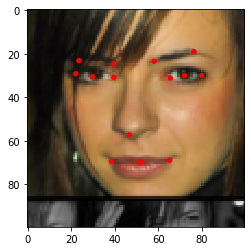

In [72]:
visualize_points(aug_imgs_train[2], aug_points_train[2])

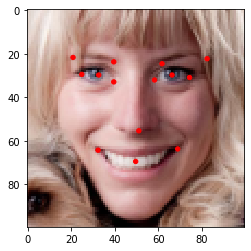

In [73]:
visualize_points(aug_imgs_train[3], aug_points_train[3])

### Network architecture and training

Now let's define neural network regressor. It will have 28 outputs, 2 numbers per point. The precise architecture is up to you. We recommend to add 2-3 (`Conv2D` + `MaxPooling2D`) pairs, then `Flatten` and 2-3 `Dense` layers. Don't forget about ReLU activations. We also recommend to add `Dropout` to every `Dense` layer (with p from 0.2 to 0.5) to prevent overfitting.


In [0]:
import pandas
import numpy
import keras
import tensorflow as tf

# from keras.models import Sequential
# from keras.layers import (
#     Conv2D, MaxPooling2D, Flatten,
#     Dense, Dropout
# )


# model = Sequential()

# if K.image_data_format() == 'channels_first':
#     x_train = x_train.reshape(x_train.shape[0], x_train.shape[3], x_train.shape[1], x_train.shape[2])
#     x_test = x_test.reshape(x_test.shape[0], x_test.shape[3], x_test.shape[1], x_test.shape[2])
#     input_shape = (x_test.shape[3], x_test.shape[1], x_test.shape[2])
# else:
#     input_shape = (x_test.shape[1], x_test.shape[2], x_test.shape[3])

# model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=input_shape))
# model.add(Convolution2D(32, 3, 3, activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))
 
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(x_train[1], activation='None'))

# model.compile(loss="mse", metrics=['accuracy'])
# print(type(model))



# Define here your model

(10800, 100, 100, 3) (5400, 100, 100, 3)
(10800, 28) (5400, 28)
(600, 100, 100, 3) (600, 28)


Time to train! Since we are training a regressor, make sure that you use mean squared error (mse) as loss. Feel free to experiment with optimization method (SGD, Adam, etc.) and its' parameters.

In [0]:
# ModelCheckpoint can be used for saving model during training.
# Saved models are useful for finetuning your model 
# See keras documentation for more info
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD, Adam

# Choose optimizer, compile model and run training

### Visualize results

Now visualize neural network results on several images from validation sample. Make sure that your network outputs different points for images (i.e. it doesn't output some constant).

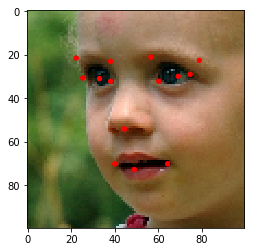

In [0]:
# Example of output